### Reading the Files

In [1]:
import bz2
import pydarn

names = ["20020208.1600.00.pgr.fitacf.bz2","20020208.1800.00.pgr.fitacf.bz2"]

def readfile(names):
      data = []
      for i in range(len(names)):
            with bz2.open(names[i]) as fp:
                  fitacf_stream = fp.read()
            reader = pydarn.SuperDARNRead(fitacf_stream, True)
            temp = reader.read_fitacf()
            data.append(temp)
      return(data)

alldata = readfile(names)
data_1600 = alldata[0]
data_1800 = alldata[1]

#Outputs names of variables from [0th] record
print(data_1600[0].keys())

odict_keys(['radar.revision.major', 'radar.revision.minor', 'origin.code', 'origin.time', 'origin.command', 'cp', 'stid', 'time.yr', 'time.mo', 'time.dy', 'time.hr', 'time.mt', 'time.sc', 'time.us', 'txpow', 'nave', 'atten', 'lagfr', 'smsep', 'ercod', 'stat.agc', 'stat.lopwr', 'noise.search', 'noise.mean', 'channel', 'bmnum', 'bmazm', 'scan', 'offset', 'rxrise', 'intt.sc', 'intt.us', 'txpl', 'mpinc', 'mppul', 'mplgs', 'mplgexs', 'ifmode', 'nrang', 'frang', 'rsep', 'xcf', 'tfreq', 'mxpwr', 'lvmax', 'combf', 'fitacf.revision.major', 'fitacf.revision.minor', 'noise.sky', 'noise.lag0', 'noise.vel', 'ptab', 'ltab', 'pwr0', 'slist', 'nlag', 'qflg', 'gflg', 'p_l', 'p_l_e', 'p_s', 'p_s_e', 'v', 'v_e', 'w_l', 'w_l_e', 'w_s', 'w_s_e', 'sd_l', 'sd_s', 'sd_phi', 'x_qflg', 'x_gflg', 'x_p_l', 'x_p_l_e', 'x_p_s', 'x_p_s_e', 'x_v', 'x_v_e', 'x_w_l', 'x_w_l_e', 'x_w_s', 'x_w_s_e', 'phi0', 'phi0_e', 'elv', 'elv_low', 'elv_high', 'x_sd_l', 'x_sd_s', 'x_sd_phi'])


### Plotting the Data

{'ax': [<Axes: ylabel='Sky \n Noise'>,
  <Axes: ylabel='Freq\n ($MHz$)'>,
  <Axes: ylabel='CPID'>,
  <Axes: ylabel='Range Gates'>,
  <Axes: ylabel='Range Gates'>,
  <Axes: ylabel='Range Gates'>,
  <Axes: xlabel='Date (UTC)', ylabel='Range Gates'>],
 'ccrs': None,
 'cm': {'p_l': <matplotlib.colors.ListedColormap at 0x201c6c8e550>,
  'v': <matplotlib.colors.LinearSegmentedColormap at 0x201c6c8ebe0>,
  'w_l': <matplotlib.colors.LinearSegmentedColormap at 0x201c6c8ed60>,
  'elv': <matplotlib.colors.ListedColormap at 0x201c6c8e5b0>},
 'cb': None,
 'fig': <Figure size 1100x850 with 12 Axes>,
 'data': 'Individual range-time plots will return full data.'}

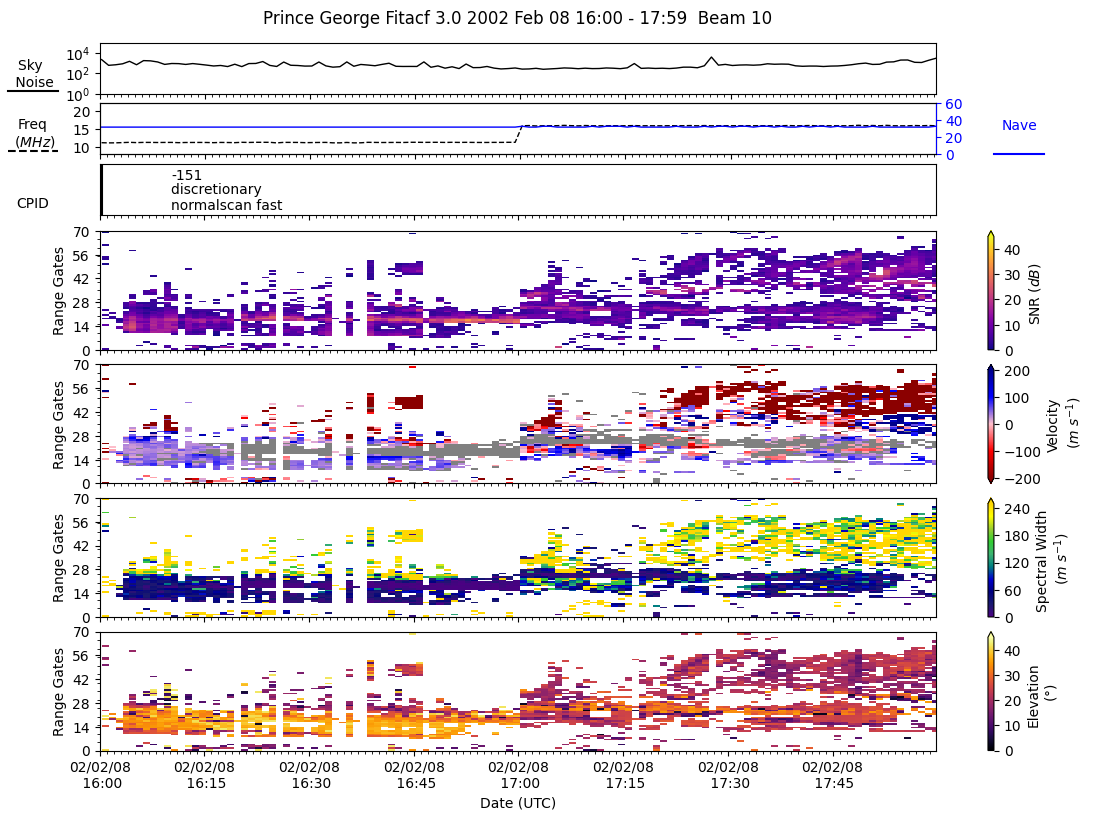

In [2]:
import matplotlib.pyplot as plt

pydarn.RTP.plot_summary(data_1600, beam_num=10,
                        range_estimation=pydarn.RangeEstimation.RANGE_GATE)

#pydarn.RTP.plot_summary(data_1800, beam_num=10,
                        #range_estimation=pydarn.RangeEstimation.RANGE_GATE)
#plt.show()

### Range Time

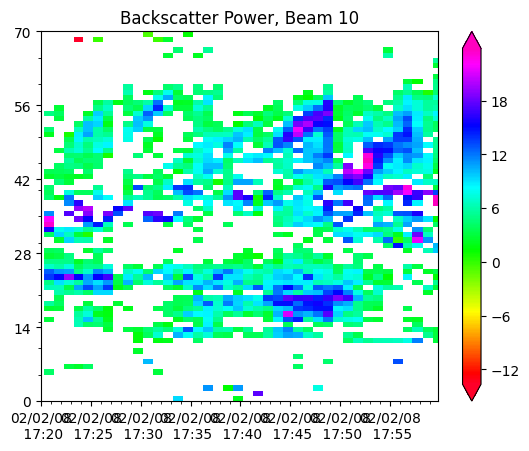

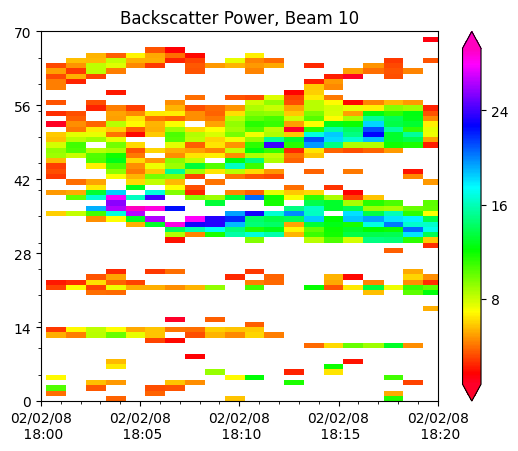

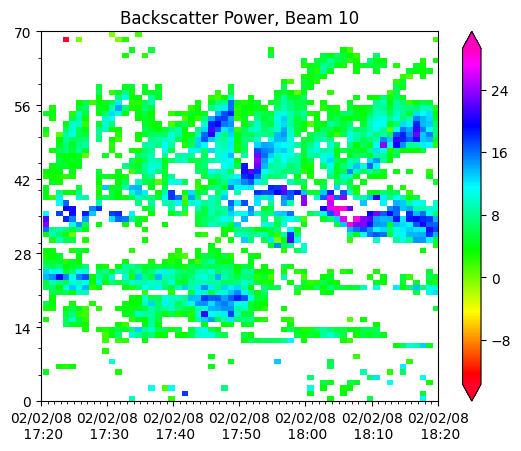

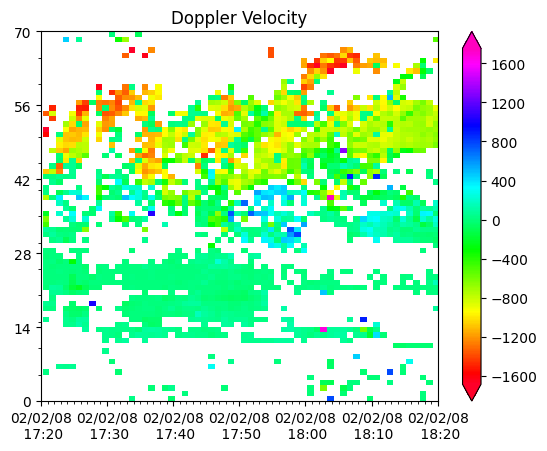

In [3]:
import datetime as dt

beam = 10
start = dt.datetime(2002,2,8,17,20)

pydarn.RTP.plot_range_time(data_1600, beam_num=beam, start_time = start, range_estimation=pydarn.RangeEstimation.RANGE_GATE, cmap = 'gist_rainbow',parameter = "p_l")
plt.title("Backscatter Power, Beam 10")  
plt.show()


end = dt.datetime(2002,2,8,18,20)
pydarn.RTP.plot_range_time(data_1800, beam_num=beam, end_time = end, range_estimation=pydarn.RangeEstimation.RANGE_GATE, cmap = 'gist_rainbow',parameter = "p_l")
plt.title("Backscatter Power, Beam 10")  
plt.show()


data = data_1600 + data_1800
pydarn.RTP.plot_range_time(data, beam_num=beam, start_time = start, end_time = end, range_estimation=pydarn.RangeEstimation.RANGE_GATE, cmap = 'gist_rainbow',parameter = "p_l")
plt.title("Backscatter Power, Beam 10")  
plt.show()

pydarn.RTP.plot_range_time(data, beam_num=beam, start_time = start, end_time = end, range_estimation=pydarn.RangeEstimation.RANGE_GATE, cmap = 'gist_rainbow',parameter = "v")
plt.title("Doppler Velocity")  
plt.show()